In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
gdp_df = pd.read_csv(r"C:\Users\dougl\DA12\projects\un-python-Dkaplan8\data\gdp_percapita.csv")

In [5]:
gdp_df.head(1)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [6]:
gdp_df.shape

(7662, 4)

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.head(1)

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266


In [9]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [10]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2021     1517.016266
1     Afghanistan  2020     1968.341002
2     Afghanistan  2019     2079.921861
3     Afghanistan  2018     2060.698973
4     Afghanistan  2017     2096.093111
...           ...   ...             ...
7657     Zimbabwe  1994     2670.106615
7658     Zimbabwe  1993     2458.783255
7659     Zimbabwe  1992     2468.278257
7660     Zimbabwe  1991     2781.787843
7661     Zimbabwe  1990     2704.757299

[7662 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [88]:
gdp_df['Year'].nunique()

33

In [90]:
gdp_df_year_counts = gdp_df.groupby(['Country']).count().sort_values(by = 'Year')
print(gdp_df_year_counts)

                           Year  GDP_Per_Capita
Country                                        
Djibouti                     10              10
Somalia                      10              10
Turks and Caicos Islands     12              12
Sint Maarten (Dutch part)    14              14
Kosovo                       15              15
...                         ...             ...
Jamaica                      33              33
Japan                        33              33
Jordan                       33              33
IDA total                    33              33
Zimbabwe                     33              33

[242 rows x 2 columns]


In [92]:
len(gdp_df_year_counts[gdp_df_year_counts['Year'] < 33])

40

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
9. What was the median GDP per capita value in 2020?

In [14]:
gdp2020 = gdp_df[gdp_df['Year'] == 2020]
print(gdp2020)

                          Country  Year  GDP_Per_Capita
1                     Afghanistan  2020     1968.341002
22    Africa Eastern and Southern  2020     3455.023119
55     Africa Western and Central  2020     3957.933804
88                        Albania  2020    13278.369769
121                       Algeria  2020    10844.770764
...                           ...   ...             ...
7503                     Viet Nam  2020    10450.622382
7536           West Bank and Gaza  2020     5402.538773
7565                        World  2020    16204.169107
7598                       Zambia  2020     3183.650773
7631                     Zimbabwe  2020     1990.319419

[242 rows x 3 columns]


C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


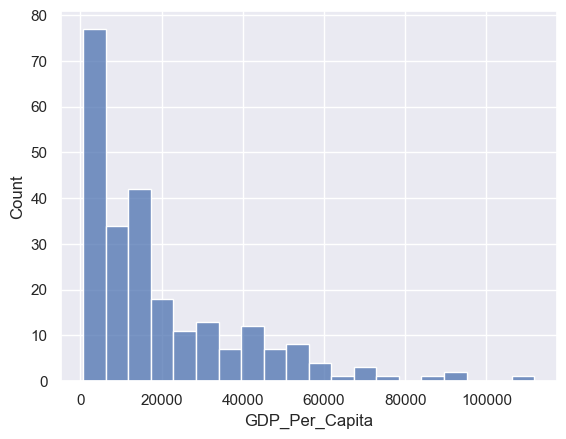

In [15]:
#Question 8
sns.set_theme(style='darkgrid')
sns.histplot(data=gdp2020, x='GDP_Per_Capita', bins=20)
plt.show()

C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


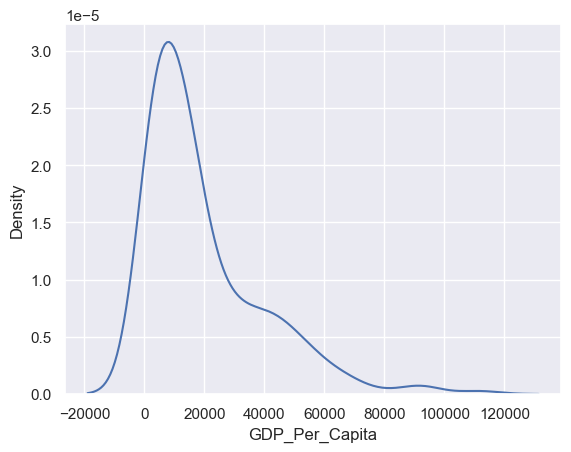

In [16]:
sns.kdeplot(gdp2020['GDP_Per_Capita'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

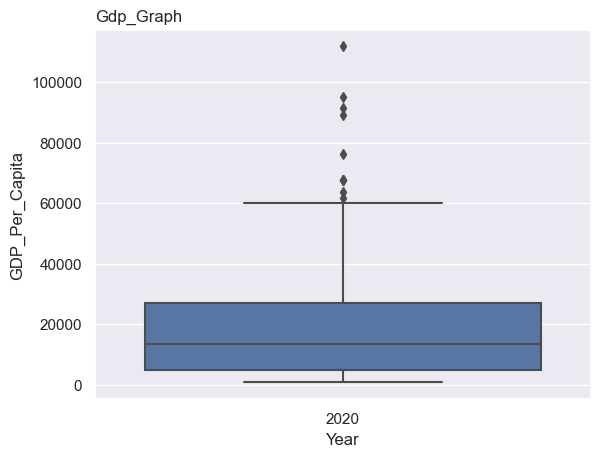

In [17]:
sns.boxplot(x=gdp2020['Year'], y=gdp2020['GDP_Per_Capita'])
plt.title('Gdp_Graph', loc='left')
plt.show

#ugly, look in walkthrough how to clean up

<function matplotlib.pyplot.show(close=None, block=None)>

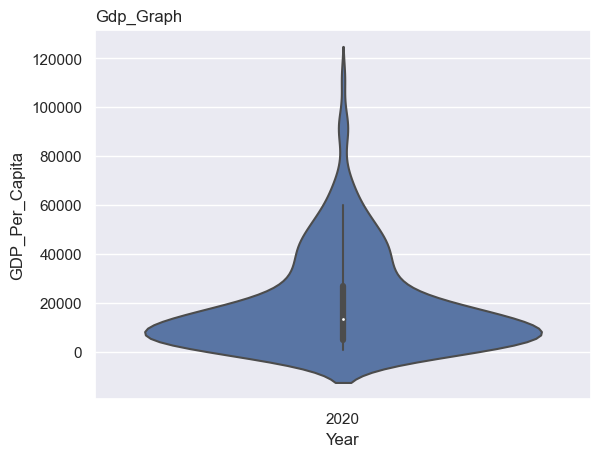

In [18]:
sns.violinplot(x=gdp2020['Year'], y=gdp2020['GDP_Per_Capita'])
plt.title('Gdp_Graph', loc='left')
plt.show

9. What was the median GDP per capita value in 2020?

In [98]:
gdp_2020_df = gdp_df[gdp_df['Year'] == 2020]
median_gdp_2020 = round(gdp_2020_df['GDP_Per_Capita'].median(), 2)
print(median_gdp_2020)

13358.0


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) 

In [20]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

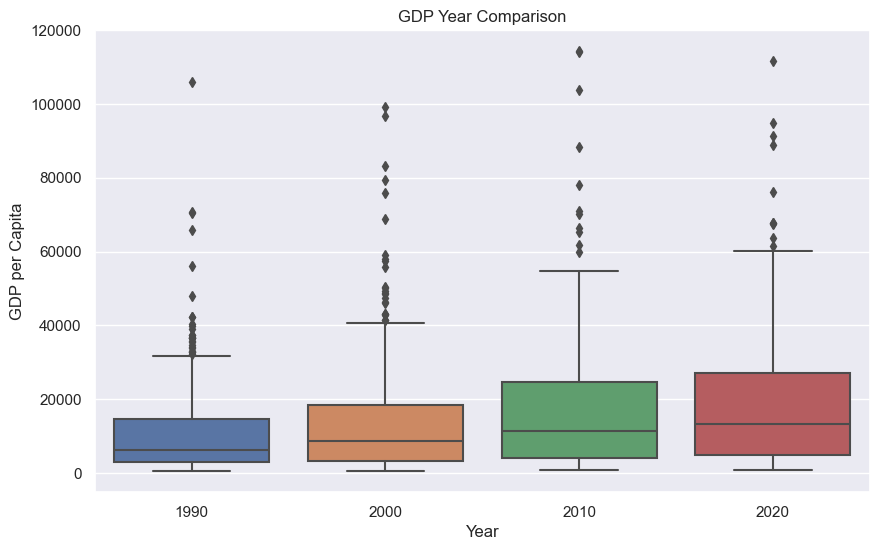

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

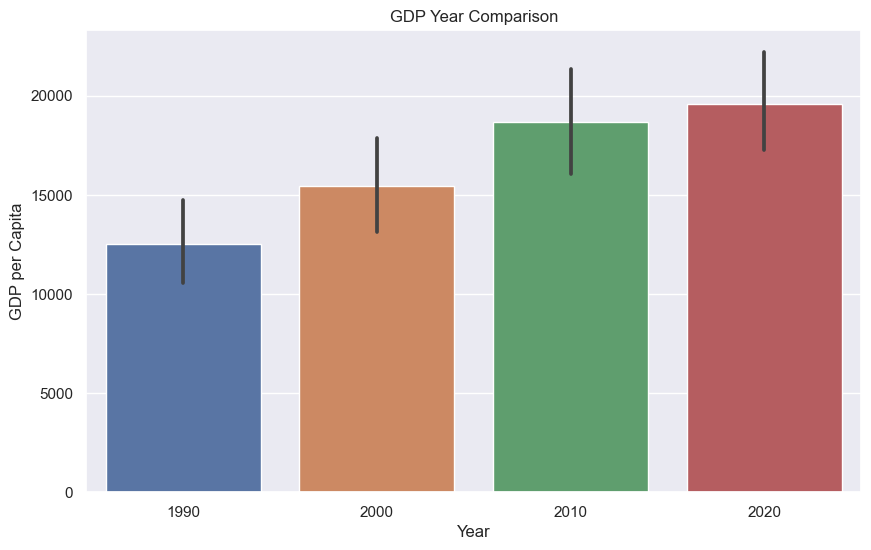

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

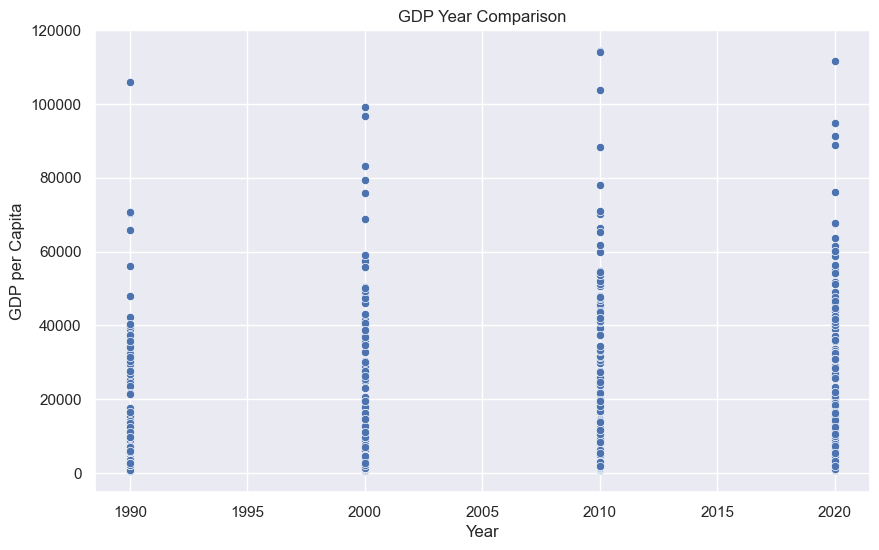

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

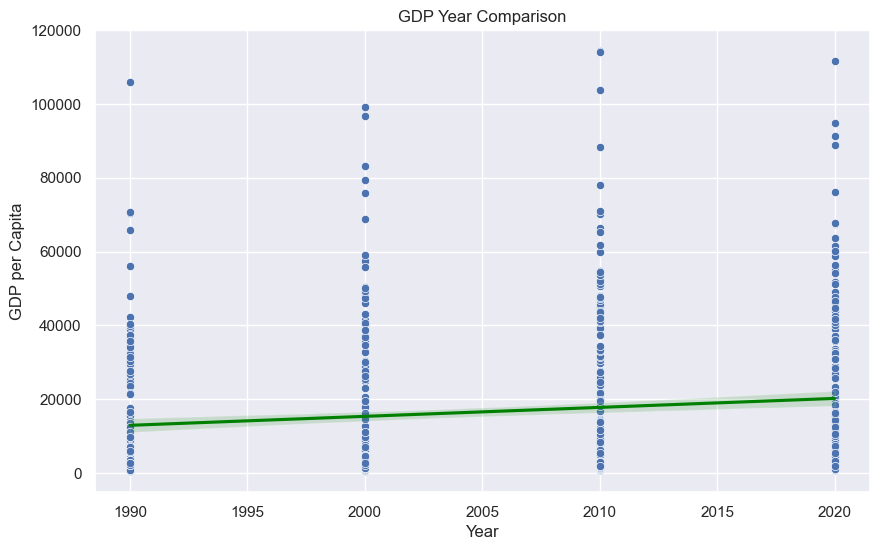

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
sns.regplot(data=gdp_decades, x='Year', y='GDP_Per_Capita', scatter=False, color='green')
plt.title('GDP Year Comparison')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [99]:
gdp_overtime = gdp_df.sort_values('Year')
gdp_overtime

,Country,Year,GDP_Per_Capita
7661,Zimbabwe,1990,2704.757299
5391,Pakistan,1990,3061.533388
6808,TÃ¼rkiye,1990,12535.919639
5358,Pacific island small states,1990,5140.322553
711,Bermuda,1990,65961.406278
...,...,...,...
646,Benin,2022,3435.171827
4471,Mauritius,2022,22786.978518
2656,Guinea,2022,2699.128855
4537,Micronesia,2022,3264.934866


In [103]:
gdp_100k = gdp_overtime[gdp_overtime['GDP_Per_Capita'] >= 100000].reset_index(drop=True)
gdp_100k.loc[0]

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 0, dtype: object

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [106]:



max2020 = gdp_2020_df['GDP_Per_Capita'].max()

In [108]:
max2020gdp = gdp_2020_df[gdp_2020_df['GDP_Per_Capita'] == max2020]

In [113]:
top_country = gdp_df[gdp_df['Year'] == 2020].nlargest(1, 'GDP_Per_Capita')['Country'].tolist()[0]

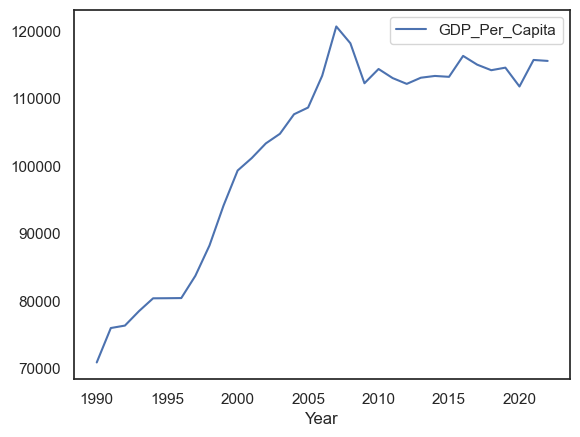

In [114]:
gdp_df[gdp_df['Country'] == top_country].plot(x = 'Year', y = 'GDP_Per_Capita', kind = 'line');

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dougl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


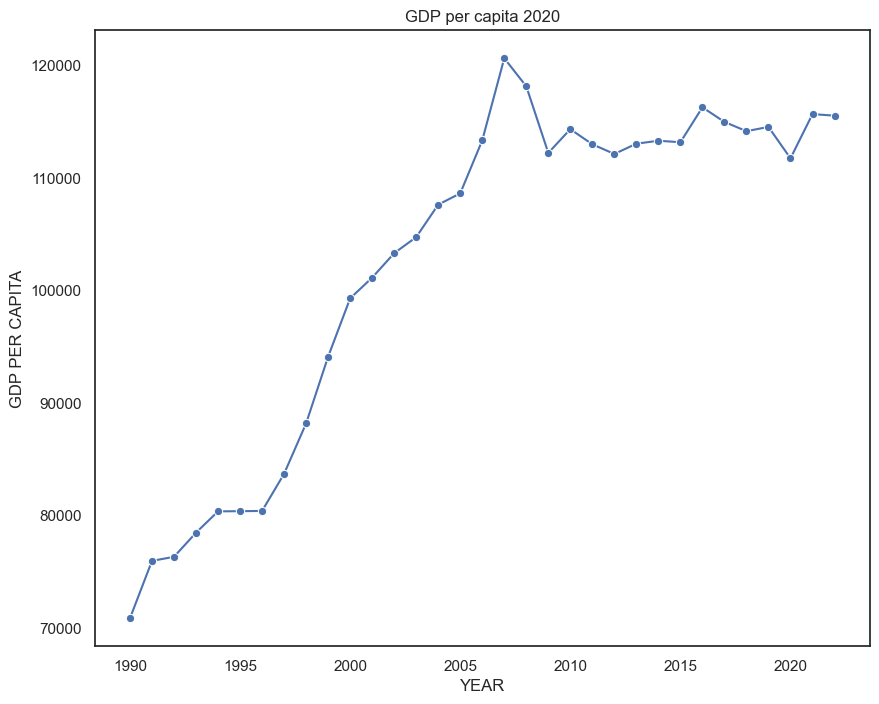

In [27]:
minc = gdp2020.loc[gdp2020['GDP_Per_Capita'].idxmin()]['Country']
gdp2020 = gdp_df[gdp_df['Year'] == 2020]
cdata = gdp_df[gdp_df['Country'] == maxgdp]
sns.set_theme(style='white', palette = None)
plt.figure(figsize = (10,8))
sns.lineplot(data = cdata, x = 'Year', y = 'GDP_Per_Capita', marker = 'o')
plt.title(f'GDP per capita 2020')
plt.xlabel('YEAR')
plt.ylabel('GDP PER CAPITA')
plt.show()

In [115]:
gdp_df[gdp_df['Year'] == 2020].nsmallest(1, 'GDP_Per_Capita')['Country'].iloc[0]

'Burundi'

In [ ]:
gdp_df_2020_nsmallest = 

In [119]:
gdp_comparison = pd.merge(
    left = gdp_df[gdp_df['Year'] == 1990],
    right = gdp_df[gdp_df['Year'] == 2020],
    on = 'Country',
    suffixes = ['_1990','_2020'])

In [120]:
gdp_comparison['2020_lower'] = gdp_comparison['GDP_Per_Capita_2020'] < gdp_comparison['GDP_Per_Capita_1990']
gdp_comparison

,Country,Year_1990,GDP_Per_Capita_1990,Year_2020,GDP_Per_Capita_2020,2020_lower
0,Africa Eastern and Southern,1990,3037.297466,2020,3455.023119,False
1,Africa Western and Central,1990,2788.301039,2020,3957.933804,False
2,Albania,1990,4827.027705,2020,13278.369769,False
3,Algeria,1990,8828.874473,2020,10844.770764,False
4,Angola,1990,5793.084512,2020,6029.691895,False
...,...,...,...,...,...,...
202,Vanuatu,1990,2774.138350,2020,2848.970240,False
203,Viet Nam,1990,2099.394649,2020,10450.622382,False
204,World,1990,9705.981267,2020,16204.169107,False
205,Zambia,1990,2290.039226,2020,3183.650773,False


In [122]:
gdp_comparison[gdp_comparison['2020_lower'] == True]

,Country,Year_1990,GDP_Per_Capita_1990,Year_2020,GDP_Per_Capita_2020,2020_lower
15,Barbados,1990,14097.395550,2020,13805.777541,True
25,Brunei,1990,70358.724094,2020,61603.550804,True
28,Burundi,1990,1175.155086,2020,711.355263,True
34,Central African Republic,1990,1200.613390,2020,847.765012,True
41,Congo,1990,5007.319245,2020,3384.654335,True
45,Dem. Rep. Congo,1990,1750.169739,2020,1044.071214,True
66,Fragile and conflict affected situations,1990,4864.814075,2020,4357.621312,True
68,Gabon,1990,17559.006114,2020,13903.288955,True
76,Guinea-Bissau,1990,1998.173206,2020,1803.630591,True
78,Haiti,1990,3612.815105,2020,2970.462845,True


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [28]:
internet_df = pd.read_csv(r"C:\Users\dougl\DA12\projects\un-python-Dkaplan8\data\internet_use.csv", nrows=6084)
internet_df.tail(1)

,Country or Area,Year,Value,Value Footnotes
6083,footnoteSeqID,Footnote,NaN,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [29]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.tail(1)

,Country or Area,Year,Value
6083,footnoteSeqID,Footnote,NaN


In [30]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df.tail(1)

,Country,Year,Internet_Users_Pct
6083,footnoteSeqID,Footnote,NaN


16. Look at the number of observations in this dataset per year. What do you notice?

In [31]:
internet_df.value_counts('Year')
#most observations in 1990

Year
1990        226
2007        217
2008        214
2011        214
2009        214
2002        214
2001        212
2005        212
2006        212
2004        210
2000        210
2010        209
2012        209
2003        208
1999        207
2016        206
2017        205
2014        204
2013        203
2015        203
1998        195
1997        188
2021        186
2020        186
2019        185
2022        184
1996        177
2018        174
1995        141
1994         92
1993         66
1992         50
1991         39
2023         11
Footnote      1
Name: count, dtype: int64

17. What is the first year to have a non-zero internet users percentage value?

In [32]:
nzeroint = internet_df[internet_df['Internet_Users_Pct'] > 0]
firstnzeroint = nzeroint.sort_values('Year').iloc[0]['Year']
print(firstnzeroint)

1990


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [50]:
intuse2014 = internet_df.loc[internet_df['Year'].isin([2014])]
intuse2014.head()

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014.0,7.0000
28,Albania,2014.0,54.3000
57,Algeria,2014.0,29.5000
87,Andorra,2014.0,86.1000
114,Angola,2014.0,21.3623


In [55]:
intuse2000 = internet_df.loc[internet_df['Year'].isin([2000])]
intuse2000.head()

,Country,Year,Internet_Users_Pct
42,Albania,2000.0,0.114097
71,Algeria,2000.0,0.491706
100,Andorra,2000.0,10.538800
128,Angola,2000.0,0.105046
150,Anguilla,2000.0,22.405400


<Axes: title={'center': '2000 vs 2014 Internet Use'}>

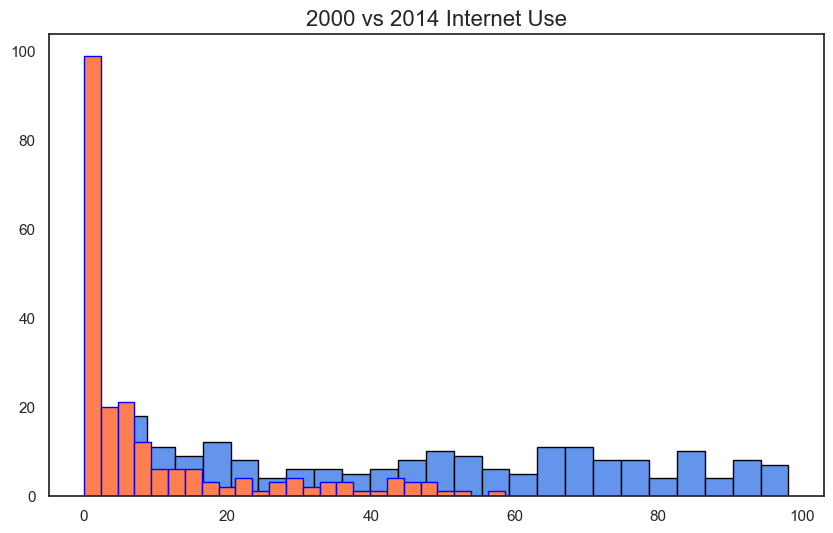

In [71]:
intuse2014['Internet_Users_Pct'].hist(bins = 25,
                            color = 'cornflowerblue',
                            edgecolor = 'black',
                            figsize = (10,6),
                            grid = False)


plt.title('2000 vs 2014 Internet Use', fontsize = 16);
intuse2000['Internet_Users_Pct'].hist(bins = 25,
                            color = 'coral',
                            edgecolor = 'blue',
                            figsize = (10,6),
                            grid = False)



In [34]:
# users2000 = internet_df[internet_df['Year'] == 2000]
# users2014 = internet_df[internet_df['Year'] == 2014]
# combinedyears = pd.concat([users2000, users2014])
# plt.figure(figsize=(12, 6))
# sns.histplot(users2000['Internet_Users_Pct'], bins=20, kde=True, color='blue')
# plt.title('Distribution of Internet Users Percentage in 2000')
# plt.xlabel('Internet Users Percent')
# plt.ylabel('Frequency')
# sns.histplot(users2014['Internet_Users_Pct'], bins=20, kde=True, color='green')
# plt.title('Distribution of Internet Users Percentage in 2014')
# plt.xlabel('Internet Users Percent')
# plt.ylabel('Frequency')
# plt.show()

19. For how many countries was the percentage of internet users below 5% in 2014?

In [45]:
intuse2014 = internet_df.loc[internet_df['Year'].isin([2014])]
intuse2014.head()

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014.0,7.0000
28,Albania,2014.0,54.3000
57,Algeria,2014.0,29.5000
87,Andorra,2014.0,86.1000
114,Angola,2014.0,21.3623


In [74]:
intuseless5 = intuse2014[intuse2014['Internet_Users_Pct'] <5]
intuseless5.count()

Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [75]:
internet_df.Year = internet_df.Year.astype('int')


# gdp_df['Year']= pd.to_numeric(gdp_df['Year'], errors='coerce')
# internet_df['Year'] = pd.to_numeric(internet_df['Year'], errors='coerce')
# gdp_df = gdp_df.dropna(subset=['Year'])
# internet_df= internet_df.dropna(subset=['Year'])
# gdp_df.loc[:, 'Year']= gdp_df['Year'].astype(int)
# internet_df.loc[:, 'Year']= internet_df['Year'].astype(int)
# gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')
# print(gdp_and_internet_use.head())
# print(gdp_and_internet_use.tail())

In [79]:
gdp_and_internet_use = pd.merge(internet_df, gdp_df, how='outer', on = ['Country', 'Year'])
gdp_and_internet_use.head()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2019,17.60,2079.921861
1,Afghanistan,2018,16.80,2060.698973
2,Afghanistan,2017,13.50,2096.093111
3,Afghanistan,2016,11.00,2101.422187
4,Afghanistan,2015,8.26,2108.714173


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [85]:
gdp_and_internet_use=gdp_and_internet_use.sort_values(by = 'Internet_Users_Pct', ascending = False).dropna()

In [86]:
gdp_and_internet_use2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use2014.head(3)

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
2592,Iceland,2014,98.1580,50450.741612
602,Bermuda,2014,96.8000,77361.104881
4173,Norway,2014,96.3005,62838.515727


In [38]:
# top3countries = internet_df[internet_df['Year']== 2014].nlargest(3, 'Internet_Users_Pct')['Country']
# top3 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top3countries)]
# graph = sns.FacetGrid(gdp_and_internet_use, col='Country', hue='Country', col_wrap=3, height=5)
# graph.map(sns.lineplot, 'Year', 'GDP_Per_Capita').add_legend()
# graph.set_axis_labels( 'Year', 'GDP_Per_Capita')
# plt.subplots_adjust(top= 0.9)
# graph.fig.suptitle("GDP Top 3 Highest Int Pct In 2014")
# plt.show()

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [39]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']== 2014]
print(gdp_and_internet_use_2014)

                          Country    Year  GDP_Per_Capita  Internet_Users_Pct
7                     Afghanistan  2014.0     2144.449634              7.0000
28    Africa Eastern and Southern  2014.0     3642.875373                 NaN
61     Africa Western and Central  2014.0     4146.994622                 NaN
94                        Albania  2014.0    11586.817446             54.3000
127                       Algeria  2014.0    11561.259795             29.5000
...                           ...     ...             ...                 ...
8954         Syrian Arab Republic  2014.0             NaN             28.0900
8991                      Türkiye  2014.0             NaN             51.0374
9022                    Venezuela  2014.0             NaN             57.0000
9049          Virgin Islands (US)  2014.0             NaN             50.0700
9092                        Yemen  2014.0             NaN             22.5500

[284 rows x 4 columns]


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

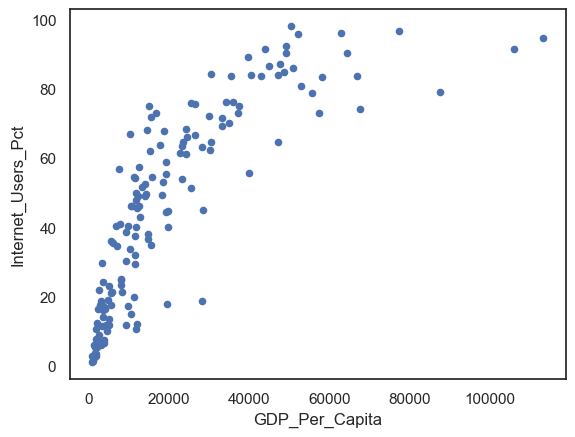

In [87]:
gdp_and_internet_use_2014.plot.scatter(y = 'Internet_Users_Pct', x = 'GDP_Per_Capita')

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.